In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# from matplotlib import gridspec
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

In [ ]:
train_data=pd.read_csv("/content/sample_data/fraudTrain.csv")
test_data=pd.read_csv("/content/sample_data/fraudTest.csv")

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,875722.000000,8.757220e+05,875722.000000,875722.000000,875722.000000,875722.000000,8.757220e+05,8.757220e+05,875722.000000,875721.000000,875721.000000
mean,437860.500000,4.167296e+17,70.288413,48795.477793,38.534339,-90.224501,8.901095e+04,1.342105e+09,38.534121,-90.224606,0.005670
std,252799.310555,1.308340e+18,162.749508,26900.808616,5.075532,13.766168,3.023269e+05,8.715097e+06,5.109892,13.778171,0.075083
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.027785,-166.671242,0.000000
25%,218930.250000,1.800400e+14,9.640000,26237.000000,34.668900,-96.798000,7.430000e+02,1.335010e+09,34.738022,-96.899015,0.000000
50%,437860.500000,3.520550e+15,47.450000,48174.000000,39.354300,-87.476900,2.456000e+03,1.342282e+09,39.364313,-87.435089,0.000000
75%,656790.750000,4.642255e+15,83.070000,72011.000000,41.894800,-80.158000,2.047800e+04,1.349552e+09,41.952545,-80.228024,0.000000
max,875721.000000,4.992346e+18,28948.900000,99783.000000,66.693300,-67.950300,2.906700e+06,1.356101e+09,67.510267,-66.956540,1.000000


In [ ]:
#value_counts() counts the occurences of each unique value in a column,
#'normalize=True' - calculates relative frequencies of each unique value

# cnt =train_data['is_fraud'].value_counts()
# prp=train_data['is_fraud'].value_counts(normalize = True)*100

# t=pd.concat([cnt,prp], axis=1)
# t.index=['Genuine', 'Fraud']
# prp.plot(kind='bar')

In [ ]:
train_data.isnull().sum().sum()

2

In [ ]:
test_data.isnull().sum().sum()

0

In [ ]:
#interpolate() use to fill NaN or null values based on adjacent values
train_data = train_data.interpolate()
test_data = test_data.interpolate()


In [ ]:
test_data.isnull().sum().sum()

0

In [ ]:
train_data.isnull().sum().sum()

0

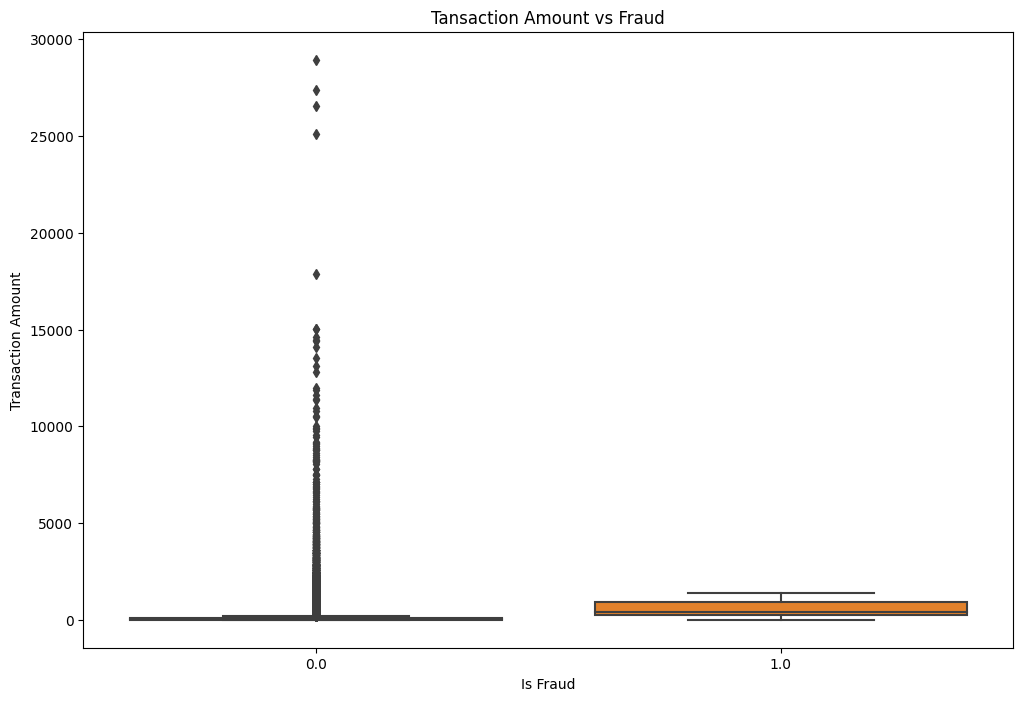

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'is_fraud' , y = 'amt' , data = train_data)
plt.title("Tansaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

In [ ]:
fig = px.pie(values = train_data['is_fraud'].value_counts(),names = ["Genuine","Fraud"] , width=700, height = 400, color_discrete_sequence = ["orange","black"] , title = "Fraud vs Genuine")
fig.show()

In [ ]:
# Renaming the 'old_column_name' to 'new_column_name'
train_data.rename(columns={'Unnamed: 0': 'Unnamed'}, inplace=True)
test_data.rename(columns={'Unnamed: 0': 'Unnamed'}, inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875722 entries, 0 to 875721
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed                875722 non-null  int64  
 1   trans_date_trans_time  875722 non-null  object 
 2   cc_num                 875722 non-null  int64  
 3   merchant               875722 non-null  object 
 4   category               875722 non-null  object 
 5   amt                    875722 non-null  float64
 6   first                  875722 non-null  object 
 7   last                   875722 non-null  object 
 8   gender                 875722 non-null  object 
 9   street                 875722 non-null  object 
 10  city                   875722 non-null  object 
 11  state                  875722 non-null  object 
 12  zip                    875722 non-null  int64  
 13  lat                    875722 non-null  float64
 14  long                   875722 non-nu

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed                555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
drop_columns = ['Unnamed','cc_num', 'merchant', 'trans_num', 'unix_time', 'first', 'last', 'street', 'zip']
train_data.drop(columns=drop_columns, inplace=True)
test_data.drop(columns=drop_columns, inplace=True)

In [ ]:
print(train_data.shape, train_data.describe, train_data.head(),train_data.tail())

(875722, 14) <bound method NDFrame.describe of        trans_date_trans_time        category     amt gender            city  \
0        2019-01-01 00:00:18        misc_net    4.97      F  Moravian Falls   
1        2019-01-01 00:00:44     grocery_pos  107.23      F          Orient   
2        2019-01-01 00:00:51   entertainment  220.11      M      Malad City   
3        2019-01-01 00:01:16   gas_transport   45.00      M         Boulder   
4        2019-01-01 00:03:06        misc_pos   41.96      M        Doe Hill   
...                      ...             ...     ...    ...             ...   
875717   2019-12-21 14:40:06  health_fitness   48.68      M   Spring Church   
875718   2019-12-21 14:40:07        misc_pos   25.94      M       Milwaukee   
875719   2019-12-21 14:40:15  health_fitness   30.95      F     West Monroe   
875720   2019-12-21 14:40:15  health_fitness  118.80      F     Saint Amant   
875721   2019-12-21 14:40:16    shopping_pos   35.78      F      Grimesland   

    

In [ ]:
print(test_data.shape, test_data.describe, test_data.head(),test_data.tail())

(555719, 14) <bound method NDFrame.describe of        trans_date_trans_time        category     amt gender          city  \
0        2020-06-21 12:14:25   personal_care    2.86      M      Columbia   
1        2020-06-21 12:14:33   personal_care   29.84      F       Altonah   
2        2020-06-21 12:14:53  health_fitness   41.28      F      Bellmore   
3        2020-06-21 12:15:15        misc_pos   60.05      M    Titusville   
4        2020-06-21 12:15:17          travel    3.19      M      Falmouth   
...                      ...             ...     ...    ...           ...   
555714   2020-12-31 23:59:07  health_fitness   43.77      M         Luray   
555715   2020-12-31 23:59:09       kids_pets  111.84      M  Lake Jackson   
555716   2020-12-31 23:59:15       kids_pets   86.88      F       Burbank   
555717   2020-12-31 23:59:24          travel    7.99      M          Mesa   
555718   2020-12-31 23:59:34   entertainment   38.13      M        Edmond   

       state      lat      l

In [ ]:
train_data['trans_date_trans_time']= pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date']=train_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_data['trans_date']= pd.to_datetime(train_data['trans_date'])
train_data['dob']= pd.to_datetime(train_data['dob'])

test_data['trans_date_trans_time']= pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date']=test_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_data['trans_date']= pd.to_datetime(test_data['trans_date'])
test_data['dob']= pd.to_datetime(test_data['dob'])

In [ ]:
train_data['trans_month']= pd.DatetimeIndex(train_data['trans_date']).month
train_data['trans_year']= pd.DatetimeIndex(train_data['trans_date_trans_time']).year

In [ ]:
train_data['latitudinal_distance']=abs(round(train_data['merch_lat']-train_data['lat'],3))
train_data['longitudinal_distance']=abs(round(train_data['merch_long']-train_data['long'],3))

test_data['latitudinal_distance']=abs(round(test_data['merch_lat']-test_data['lat'],3))
test_data['longitudinal_distance']=abs(round(test_data['merch_long']-test_data['long'],3))

In [ ]:
train_data.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0,2019-01-01,1,2019,0.068,0.870
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0,2019-01-01,1,2019,0.271,0.024
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0,2019-01-01,1,2019,0.970,0.108
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0.0,2019-01-01,1,2019,0.804,0.447
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0,2019-01-01,1,2019,0.254,0.830


In [ ]:
test_data.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,latitudinal_distance,longitudinal_distance
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,0.020,0.265
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,0.870,0.476
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,0.177,0.660
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,0.243,0.064
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,0.706,0.868


In [ ]:
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train_data.drop(columns = drop_columns,inplace = True)
test_data.drop(columns = drop_columns,inplace = True)

In [ ]:
train_data.gender = train_data.gender.apply(lambda x: 1 if x=="M" else 0)
test_data.gender = test_data.gender.apply(lambda x: 1 if x=="M" else 0 )

In [ ]:
train_data.head()

,category,amt,gender,city_pop,is_fraud,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,0,3495,0.0,1,2019,0.068,0.870
1,grocery_pos,107.23,0,149,0.0,1,2019,0.271,0.024
2,entertainment,220.11,1,4154,0.0,1,2019,0.970,0.108
3,gas_transport,45.00,1,1939,0.0,1,2019,0.804,0.447
4,misc_pos,41.96,1,99,0.0,1,2019,0.254,0.830


In [ ]:
test_data.head()

,category,amt,gender,city_pop,is_fraud,latitudinal_distance,longitudinal_distance
0,personal_care,2.86,1,333497,0,0.020,0.265
1,personal_care,29.84,0,302,0,0.870,0.476
2,health_fitness,41.28,0,34496,0,0.177,0.660
3,misc_pos,60.05,1,54767,0,0.243,0.064
4,travel,3.19,1,1126,0,0.706,0.868


In [ ]:
train_data = pd.get_dummies(train_data, columns = ['category'], prefix = 'category')
test_data = pd.get_dummies(test_data, columns = ['category'], prefix = 'category')

test_data = test_data.reindex(columns = train_data.columns, fill_value = 0)

In [ ]:
X_train =train_data.drop('is_fraud', axis =1)
y_train= train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [ ]:
#Synthetic Minority Over-sampling Technique (SMOTE) is used to deal with biased/imbalanced dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

#fit_resample() used to generate synthetic samples for minority class/ classes with lower no of occurences
X_train,y_train=smote.fit_resample(X_train,y_train)

In [ ]:
y_train[1741509]

1.0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_test[3]

0

In [ ]:
y_pred[3]

0.0

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.86    553574\n           1       0.99      0.68      0.81    553574\n\n    accuracy                           0.84   1107148\n   macro avg       0.87      0.84      0.83   1107148\nweighted avg       0.87      0.84      0.83   1107148\n'